In [1]:
import pandas as pd
import scanpy as sc
import scipy
import anndata
import scirpy as ir

# BCC Data

Download files here
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE123813 and save to '../data/BCC_Yost_2018/'

This script saves the following files:
- bcc_scRNA_counts.pkl: Just a pickled version of raw scRNA data for faster loading
- bcc_tcr_raw.pkl: pd.DataFrame of tcr metadata + split TCR sequences
- bcc_tcr_scirpy.h5ad: annData of TCR data in scirpy format without gene expression
- bcc_tcr_and_gene.h5ad: Joint annData of TCR and gene expression data

## Gene Expression Data

In [2]:
bcc_all_metadata = pd.read_csv('../data/BCC_Yost_2018/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata.head()

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-8.491220,5.533525
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,CD45+ CD3+,CD8_ex_T_cells,4.623724,6.668594
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.920441,3.196553
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.878223,4.333302
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,CD45+ CD3+,Tregs,-2.382094,11.260816


In [3]:
bcc_all_metadata = pd.read_csv('../data/BCC_Yost_2018/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-8.491220,5.533525
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,CD45+ CD3+,CD8_ex_T_cells,4.623724,6.668594
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.920441,3.196553
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.878223,4.333302
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,CD45+ CD3+,Tregs,-2.382094,11.260816
...,...,...,...,...,...,...
bcc.su012.pre.tcell_TTTGGTTGTAGATTAG,su012,pre,CD45+ CD3+,Tregs,2.674866,11.652218
bcc.su012.pre.tcell_TTTGGTTGTCAAGCGA,su012,pre,CD45+ CD3+,CD8_mem_T_cells,-6.329399,5.186572
bcc.su012.pre.tcell_TTTGTCAAGAGGACGG,su012,pre,CD45+ CD3+,CD8_mem_T_cells,-8.817718,0.048990


# Uncomment the cell during for first use

In [4]:
# Very slow (takes about 30min), so save as pickle for future use
# bcc_scRNA_counts = pd.read_pickle('../data/BCC_Yost_2018/bcc_scRNA_counts.txt', sep='\t')
# bcc_scRNA_counts.to_pickle('../data/BCC_Yost_2018/bcc_scRNA_counts.pkl')

In [5]:
bcc_scRNA_counts = pd.read_pickle('../data/BCC_Yost_2018/bcc_scRNA_counts.pkl')
bcc_scRNA_counts

,bcc.su001.pre.tcell_AAACCTGCAGATCGGA,bcc.su001.pre.tcell_AAACCTGCAGGGATTG,bcc.su001.pre.tcell_AAACGGGCATAGACTC,bcc.su001.pre.tcell_AAACGGGTCATACGGT,bcc.su001.pre.tcell_AAACGGGTCATAGCAC,bcc.su001.pre.tcell_AAACGGGTCTTGGGTA,bcc.su001.pre.tcell_AAAGATGAGACAGGCT,bcc.su001.pre.tcell_AAAGATGCACAAGCCC,bcc.su001.pre.tcell_AAAGATGGTTTGGGCC,bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,...,bcc.su012.post.tcell_TTTACTGGTCGGGTCT,bcc.su012.post.tcell_TTTACTGTCTTGCCGT,bcc.su012.post.tcell_TTTATGCAGCTAGCCC,bcc.su012.post.tcell_TTTATGCAGGCAGTCA,bcc.su012.post.tcell_TTTATGCCATATGGTC,bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,bcc.su012.post.tcell_TTTGTCAAGCACCGTC,bcc.su012.post.tcell_TTTGTCAAGTGAACGC,bcc.su012.post.tcell_TTTGTCAGTCCCTTGT
FO538757.2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP006222.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
LINC00115,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-314A20.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FNDC8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTC-360G5.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XXbac-B135H6.18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bcc_scRNA_counts = bcc_scRNA_counts.transpose()
bcc_scRNA_counts.index.name = 'cell.id'
bcc_scRNA_counts

,FO538757.2,AP006222.2,RP11-206L10.9,LINC00115,FAM41C,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,THRIL,IGHV3-29,RP11-715J22.4,CTA-363E6.7,RP11-538I12.2,RP11-314A20.5,FNDC8,CTC-360G5.6,XXbac-B135H6.18,GGTLC2
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGCATAGACTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGTCATACGGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Make metadata row order aligned with scRNA data
bcc_all_metadata = pd.concat([bcc_scRNA_counts[['FO538757.2', 'AP006222.2']], bcc_all_metadata], axis=1).drop(columns=['FO538757.2', 'AP006222.2'])
bcc_all_metadata

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669
...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,su012,post,CD45+ CD3+,CD4_T_cells,-1.876718,6.133727
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,su012,post,CD45+ CD3+,CD4_T_cells,0.898351,6.325706
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,su012,post,CD45+ CD3+,CD4_T_cells,-0.924840,6.347132


In [8]:
bcc_scRNA_counts.values.shape

(53030, 23309)

In [9]:
X = scipy.sparse.csr_matrix(bcc_scRNA_counts.values)

In [10]:
adata = anndata.AnnData(X=X, obs=bcc_all_metadata, var={'gene_ids' : list(bcc_scRNA_counts.columns)})
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'
    var: 'gene_ids'

In [11]:
# Sanity check to see if dataset is correct with number of patients=11 as mentioned in paper
adata.obs['patient'].unique()

array(['su001', 'su002', 'su003', 'su004', 'su005', 'su006', 'su007',
       'su008', 'su009', 'su010', 'su012'], dtype=object)

In [12]:
adata.obs

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669
...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,su012,post,CD45+ CD3+,CD4_T_cells,-1.876718,6.133727
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,su012,post,CD45+ CD3+,CD4_T_cells,0.898351,6.325706
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,su012,post,CD45+ CD3+,CD4_T_cells,-0.924840,6.347132


In [13]:
adata.var.set_index('gene_ids', inplace=True)
adata.var

""
gene_ids
FO538757.2
AP006222.2
RP11-206L10.9
LINC00115
FAM41C
...
RP11-314A20.5
FNDC8
CTC-360G5.6


In [14]:
adata.write('../data/BCC_Yost_2018/bcc_scRNA.h5ad')

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical


#### Reload saved data for sanity check

In [15]:
adata2 = sc.read('../data/BCC_Yost_2018/bcc_scRNA.h5ad')

In [16]:
adata2

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'

In [17]:
adata2.obs.head()

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669


#### UMAP of all metadata

In [18]:
adata2.obsm['umap'] = adata2.obs[['UMAP1', 'UMAP2']].values

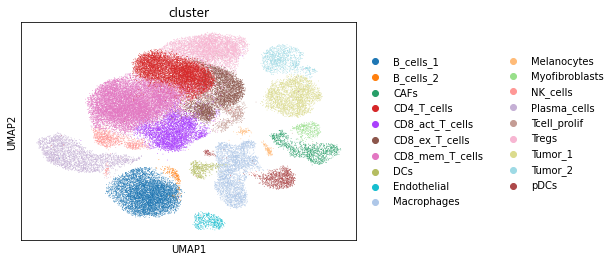

In [19]:
sc.pl.umap(adata2, color='cluster')

## TCR Seq

In [20]:
bcc_tcell_metadata = pd.read_csv('../data/BCC_Yost_2018/bcc_tcell_metadata.txt', sep='\t', index_col=0)
bcc_tcell_metadata

,patient,treatment,cluster,UMAP1,UMAP2
cell.id,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287
...,...,...,...,...,...
bcc.su012.pre.tcell_TTTGGTTGTAGATTAG,su012,pre,Tregs,-6.709299,-0.328671
bcc.su012.pre.tcell_TTTGGTTGTCAAGCGA,su012,pre,CD8_mem,6.639210,1.112855
bcc.su012.pre.tcell_TTTGTCAAGAGGACGG,su012,pre,CD8_mem,6.311589,0.403260


In [21]:
bcc_tcr = pd.read_csv('../data/BCC_Yost_2018/bcc_tcr.txt', sep='\t', index_col=0)
bcc_tcr.index.name = 'cell.id'
bcc_tcr

,cdr3s_nt,cdr3s_aa
cell.id,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,TRB:TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,TRB:CASRLAGGLQETQYF
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,TRA:TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATC...,TRA:CAETILYSSASKIIF;TRB:CAWTTPGTSNSPLHF
bcc.su001.pre.tcell_AAAGATGAGACAGGCT,TRA:TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGA...,TRA:CIVSLSLVIYNQGGKLIF;TRB:CASSSSWEGSPGEQYF
bcc.su001.pre.tcell_AAAGATGCACAAGCCC,TRA:TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT...,TRA:CAVERNTGGFKTIF;TRB:CASSQLGNGNQPQHF
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,TRA:TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATC...,TRA:CAGGNYGGATNKLIF;TRB:CASSLPGARVAFF
...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,TRB:TGTGCCAGCAGCTTGCGACAGGGAGCTGGCAGCAATCAGCCC...,TRB:CASSLRQGAGSNQPQHF
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,TRA:TGTGCAGCAAGTGAAAACTACAAGCTCAGCTTT;TRB:TGTG...,TRA:CAASENYKLSF;TRB:CASSGEGRYGYTF
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,TRA:TGTGCTGTGAGTACTAATGACATGCGCTTT;TRB:TGTGCCA...,TRA:CAVSTNDMRF;TRB:CASSPIGSYEQYF


All sequences (e.g. TRA + TRB) are saved in one string.
Split sequences into separate columns

In [22]:
bcc_tcr.iloc()[7]['cdr3s_nt']

'TRA:TGTGCTTTCTTTGACAATGACATGCGCTTT;TRB:TGCGCCAGCAGCCCGTGGACAGGATCTGAAGCTTTCTTT'

In [23]:
tcr_cells = []
for idx, row in bcc_tcr.iterrows():
    cell = {'cell.id': row.name,
           'cdr3s_nt': row['cdr3s_nt'],
           'cdr3s_aa': row['cdr3s_aa']}
    
    # Iterate through all nucleotide sequences
    tra_counter = 0
    trb_counter = 0
    for num, seq in enumerate(row['cdr3s_nt'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_nt_alpha_{tra_counter}'] = seq.split('TRA:')[1]
            tra_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_nt_beta_{trb_counter}'] = seq.split('TRB:')[1]
            trb_counter += 1
    
    # Iterate through all amino acid sequences
    tra_aa_counter = 0
    trb_aa_counter = 0
    for num, seq in enumerate(row['cdr3s_aa'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_aa_alpha_{tra_aa_counter}'] = seq.split('TRA:')[1]
            tra_aa_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_aa_beta_{trb_aa_counter}'] = seq.split('TRB:')[1]
            trb_aa_counter += 1
    tcr_cells.append(cell)

In [24]:
bcc_tcr = pd.DataFrame(tcr_cells).set_index('cell.id')

In [25]:
# Change order of columns
bcc_tcr = bcc_tcr[['cdr3s_nt', 'cdr3s_aa', 
                   'cdr3_nt_alpha_0', 'cdr3_nt_alpha_1', 'cdr3_nt_alpha_2', 'cdr3_nt_alpha_3', 
                   'cdr3_nt_beta_0', 'cdr3_nt_beta_1', 'cdr3_nt_beta_2', 'cdr3_nt_beta_3',
                   'cdr3_aa_alpha_0', 'cdr3_aa_alpha_1', 'cdr3_aa_alpha_2', 'cdr3_aa_alpha_3',
                   'cdr3_aa_beta_0', 'cdr3_aa_beta_1', 'cdr3_aa_beta_2', 'cdr3_aa_beta_3']]

In [26]:
bcc_tcr.head()

,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,cdr3_nt_alpha_3,cdr3_nt_beta_0,cdr3_nt_beta_1,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,TRB:TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,TRB:CASRLAGGLQETQYF,NaN,NaN,NaN,NaN,TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASRLAGGLQETQYF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,TRA:TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATC...,TRA:CAETILYSSASKIIF;TRB:CAWTTPGTSNSPLHF,TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATCTTT,NaN,NaN,NaN,TGTGCCTGGACCACCCCCGGGACCAGTAATTCACCCCTCCACTTT,NaN,NaN,NaN,CAETILYSSASKIIF,NaN,NaN,NaN,CAWTTPGTSNSPLHF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGAGACAGGCT,TRA:TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGA...,TRA:CIVSLSLVIYNQGGKLIF;TRB:CASSSSWEGSPGEQYF,TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGAAAGC...,NaN,NaN,NaN,TGTGCCAGCAGCTCATCCTGGGAGGGGAGTCCGGGCGAGCAGTACTTC,NaN,NaN,NaN,CIVSLSLVIYNQGGKLIF,NaN,NaN,NaN,CASSSSWEGSPGEQYF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGCACAAGCCC,TRA:TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT...,TRA:CAVERNTGGFKTIF;TRB:CASSQLGNGNQPQHF,TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT,NaN,NaN,NaN,TGTGCCAGCAGCCAATTGGGGAATGGCAATCAGCCCCAGCATTTT,NaN,NaN,NaN,CAVERNTGGFKTIF,NaN,NaN,NaN,CASSQLGNGNQPQHF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,TRA:TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATC...,TRA:CAGGNYGGATNKLIF;TRB:CASSLPGARVAFF,TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATCTTT,NaN,NaN,NaN,TGTGCCAGCAGTTTGCCGGGGGCCCGGGTGGCTTTCTTT,NaN,NaN,NaN,CAGGNYGGATNKLIF,NaN,NaN,NaN,CASSLPGARVAFF,NaN,NaN,NaN


In [27]:
# Calculate number of Dual alpha IRs
len(bcc_tcr) - bcc_tcr['cdr3_nt_alpha_1'].isnull().sum()

1507

In [28]:
# Calculate number of Multichain IRs
len(bcc_tcr) - bcc_tcr['cdr3_nt_alpha_2'].isnull().sum()

50

In [29]:
bcc_tcr_joined = pd.concat([bcc_tcell_metadata, bcc_tcr], axis=1)
bcc_tcr_joined.to_pickle('../data/BCC_Yost_2018/bcc_tcr_raw.pkl')
bcc_tcr_joined

,patient,treatment,cluster,UMAP1,UMAP2,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,...,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029,TRB:TGTGCCAGCAGCTCAGCAGGGGGCTTGAACACTGAAGCTTTC...,TRB:CASSSAGGLNTEAFF;TRB:CAWSVGPSSQGRYEQYF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSSAGGLNTEAFF,CAWSVGPSSQGRYEQYF,NaN,NaN
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360,TRB:TGTGCCAGCAGCGTAGAAATAGGGATCGGCTACACCTTC,TRB:CASSVEIGIGYTF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSVEIGIGYTF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734,TRB:TGTGCCAGCAGCCTTAGCGGGGGGAGCTCCTACAATGAGCAG...,TRB:CASSLSGGSSYNEQFF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSLSGGSSYNEQFF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957,TRB:TGTGCCAGCAGCTTAGACCACGGGACAGGGGGCTTTAACACC...,TRB:CASSLDHGTGGFNTGELFF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSLDHGTGGFNTGELFF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287,TRA:TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,TRA:CADAGGTSYGKLTF,TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,NaN,NaN,...,NaN,NaN,CADAGGTSYGKLTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bcc.su012.pre.tcell_CGTCTACAGGTGCTAG,NaN,NaN,NaN,NaN,NaN,TRA:TGTGCTGTGAGAGAAACTGGGGCAAACAACCTCTTCTTT;TR...,TRA:CAVRETGANNLFF;TRB:CASSTGQGAGQPQHF,TGTGCTGTGAGAGAAACTGGGGCAAACAACCTCTTCTTT,NaN,NaN,...,NaN,NaN,CAVRETGANNLFF,NaN,NaN,NaN,CASSTGQGAGQPQHF,NaN,NaN,NaN
bcc.su012.pre.tcell_GACGCGTTCTCAACTT,NaN,NaN,NaN,NaN,NaN,TRA:TGTGCTGTGGGAAACACCAATGCAGGCAAATCAACCTTT;TR...,TRA:CAVGNTNAGKSTF;TRB:CASSEGVRTKYF,TGTGCTGTGGGAAACACCAATGCAGGCAAATCAACCTTT,NaN,NaN,...,NaN,NaN,CAVGNTNAGKSTF,NaN,NaN,NaN,CASSEGVRTKYF,NaN,NaN,NaN
bcc.su012.pre.tcell_GATGAAAGTACAGTGG,NaN,NaN,NaN,NaN,NaN,TRA:TGCATCGTCAGAGTCGTCTCTACCTCAGGAACCTACAAATAC...,TRA:CIVRVVSTSGTYKYIF;TRB:CASSDISNQPQHF,TGCATCGTCAGAGTCGTCTCTACCTCAGGAACCTACAAATACATCTTT,NaN,NaN,...,NaN,NaN,CIVRVVSTSGTYKYIF,NaN,NaN,NaN,CASSDISNQPQHF,NaN,NaN,NaN


In [30]:
# Show cells with 4 beta chains
bcc_tcr_joined[~bcc_tcr_joined['cdr3_aa_beta_3'].isna()]

,patient,treatment,cluster,UMAP1,UMAP2,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,...,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su009.post.tcell_TCAGCAAAGTGCGATG,su009,post,Tfh,-3.948093,-3.062133,TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TR...,TRA:CALVTGSQGNLIF;TRA:CAVDQAGGTSYGKLTF;TRB:CAI...,TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT,TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,NaN,...,TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT,TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT,CALVTGSQGNLIF,CAVDQAGGTSYGKLTF,NaN,NaN,CAIRDQNTGELFF,CASSLAGTSPSNEQFF,CASSQGSGPAGELFF,CSIWTGLNTEAFF
bcc.su009.post.tcell_TGTGGTATCATCGATG,su009,post,Naive,2.635549,2.212065,TRA:TGTGCTGTGAGCCCTGACACGGGCAGGAGAGCACTTACTTTT...,TRA:CAVSPDTGRRALTF;TRA:CAYNYAGNNRKLIW;TRA:CGAL...,TGTGCTGTGAGCCCTGACACGGGCAGGAGAGCACTTACTTTT,TGTGCTTATAACTATGCTGGCAACAACCGTAAGCTGATTTGG,TGTGGAGCATTAATCTCTGGTTCTGCAAGGCAACTGACCTTT,...,TGTGCCAGCAGCTTACAGGGGGGGGGAATCACAGATACGCAGTATTTT,TGTGCCAGCAGCTTGTTGGGGACAGGGTTGCAACGACAGTACTTC,CAVSPDTGRRALTF,CAYNYAGNNRKLIW,CGALISGSARQLTF,NaN,CASSLLGTGLQRQYF,CASSLQGGGITDTQYF,CASSQAGTAGVDIQYF,CSATQTSGRLVDTQYF


In [31]:
# Show a sample of cdr3s_nt string with multichain
bcc_tcr_joined[~bcc_tcr_joined['cdr3_aa_beta_3'].isna()].iloc()[0]['cdr3s_nt']

'TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TRA:TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT;TRB:TGCAGCATCTGGACAGGGTTGAACACTGAAGCTTTCTTT;TRB:TGCGCCAGCAGCTTGGCCGGGACTAGTCCAAGCAATGAGCAGTTCTTC;TRB:TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT;TRB:TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT'

In [32]:
tcr_cells = []
for idx, row in bcc_tcr_joined.iterrows():
    cell = ir.io.IrCell(cell_id=row.name)
    for i in range(4):  # reversed so the first TRA and TRB will be saved in multichain cells
        if type(row[f'cdr3_aa_alpha_{i}']) is str:
            alpha_chain = ir.io.IrChain(
                locus="TRA",
                cdr3=row[f"cdr3_aa_alpha_{i}"],
                cdr3_nt=row[f"cdr3_nt_alpha_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(alpha_chain)

        if type(row[f'cdr3_aa_beta_{i}']) is str:
            beta_chain = ir.io.IrChain(
                locus="TRB",
                cdr3=row[f"cdr3_aa_beta_{i}"],
                cdr3_nt=row[f"cdr3_nt_beta_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(beta_chain)
    tcr_cells.append(cell)


In [33]:
tcr_cells

[IrCell bcc.su001.post.tcell_AAACCTGAGCTTCGCG with 2 chains,
 IrCell bcc.su001.post.tcell_AAACCTGAGGACATTA with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCACGCATCG with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCAGATGGGT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCAGTGGAGT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCATGCCTTC with 3 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCATTGCGGC with 0 chains,
 IrCell bcc.su001.post.tcell_AAACCTGGTTATCACG with 2 chains,
 IrCell bcc.su001.post.tcell_AAACCTGTCACCCGAG with 3 chains,
 IrCell bcc.su001.post.tcell_AAACCTGTCAGGTTCA with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGCACGAAATA with 2 chains,
 IrCell bcc.su001.post.tcell_AAACGGGCAGATCGGA with 3 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTAAATACG with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTTGTACAC with 2 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTTGTCTTT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGTCAGCTCTC with 2 chains,
 IrCell bcc.su001.post.t

In [34]:
adata_tcr = ir.io.from_ir_objs(tcr_cells)
adata_tcr.write('../data/BCC_Yost_2018/bcc_tcr_scirpy.h5ad')

... storing 'multi_chain' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


In [35]:
pd.options.display.max_columns = None
adata_tcr.obs.head(20)

,multi_chain,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,False,NaN,NaN,TRB,TRB,None,None,CAWSVGPSSQGRYEQYF,CASSSAGGLNTEAFF,None,None,TGTGCCTGGAGTGTAGGGCCCTCCTCACAGGGGCGCTACGAGCAGT...,TGTGCCAGCAGCTCAGCAGGGGGCTTGAACACTGAAGCTTTCTTT,NaN,NaN,0.0,0.0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGAGGACATTA,False,NaN,NaN,TRB,NaN,None,None,CASSVEIGIGYTF,None,None,None,TGTGCCAGCAGCGTAGAAATAGGGATCGGCTACACCTTC,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCACGCATCG,False,NaN,NaN,TRB,NaN,None,None,CASSLSGGSSYNEQFF,None,None,None,TGTGCCAGCAGCCTTAGCGGGGGGAGCTCCTACAATGAGCAGTTCTTC,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCAGATGGGT,False,NaN,NaN,TRB,NaN,None,None,CASSLDHGTGGFNTGELFF,None,None,None,TGTGCCAGCAGCTTAGACCACGGGACAGGGGGCTTTAACACCGGGG...,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,False,TRA,NaN,NaN,NaN,CADAGGTSYGKLTF,None,None,None,TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,None,None,None,0.0,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCATGCCTTC,False,TRA,TRA,TRB,NaN,CAVWGSSNTGKLIF,CAMRVPNQGGKLIF,CAISELGGATRTGELFF,None,TGTGCTGTCTGGGGCTCTAGCAACACAGGCAAACTAATCTTT,TGTGCAATGAGAGTGCCCAACCAGGGAGGAAAGCTTATCTTC,TGTGCCATCAGTGAGTTAGGAGGGGCCACAAGGACCGGGGAGCTGT...,None,0.0,0.0,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCATTGCGGC,nan,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False
bcc.su001.post.tcell_AAACCTGGTTATCACG,False,TRA,NaN,TRB,NaN,CAVNDKGSARQLTF,None,CASSQENGRVAEAFF,None,TGTGCCGTGAATGATAAAGGTTCTGCAAGGCAACTGACCTTT,None,TGCGCCAGCAGCCAAGAAAATGGACGGGTCGCTGAAGCTTTCTTT,None,0.0,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGTCACCCGAG,False,TRA,TRA,TRB,NaN,CAVRDDRNNNARLMF,CAGAKGGSYIPTF,CASSETSGGPWDEQFF,None,TGTGCAGGAGCGAAAGGAGGAAGCTACATACCTACATTT,TGCGCTGTGAGAGATGATAGAAATAACAATGCCAGACTCATGTTT,TGTGCCAGCAGTGAAACTAGCGGGGGGCCCTGGGATGAGCAGTTCTTC,None,0.0,0.0,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True


In [36]:
bcc_tcr_joined.loc['bcc.su009.post.tcell_TCAGCAAAGTGCGATG']

patient                                                        su009
treatment                                                       post
cluster                                                          Tfh
UMAP1                                                      -3.948093
UMAP2                                                      -3.062133
cdr3s_nt           TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TR...
cdr3s_aa           TRA:CALVTGSQGNLIF;TRA:CAVDQAGGTSYGKLTF;TRB:CAI...
cdr3_nt_alpha_0              TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT
cdr3_nt_alpha_1     TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
cdr3_nt_alpha_2                                                  NaN
cdr3_nt_alpha_3                                                  NaN
cdr3_nt_beta_0               TGCAGCATCTGGACAGGGTTGAACACTGAAGCTTTCTTT
cdr3_nt_beta_1      TGCGCCAGCAGCTTGGCCGGGACTAGTCCAAGCAATGAGCAGTTCTTC
cdr3_nt_beta_2         TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT
cdr3_nt_beta_3               TGTGC

In [37]:
adata_tcr.obs.loc['bcc.su009.post.tcell_TCAGCAAAGTGCGATG']

multi_chain                                                          True
IR_VJ_1_locus                                                         TRA
IR_VJ_2_locus                                                         TRA
IR_VDJ_1_locus                                                        TRB
IR_VDJ_2_locus                                                        TRB
IR_VJ_1_cdr3                                             CAVDQAGGTSYGKLTF
IR_VJ_2_cdr3                                                CALVTGSQGNLIF
IR_VDJ_1_cdr3                                               CSIWTGLNTEAFF
IR_VDJ_2_cdr3                                             CASSQGSGPAGELFF
IR_VJ_1_cdr3_nt          TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
IR_VJ_2_cdr3_nt                   TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT
IR_VDJ_1_cdr3_nt                  TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT
IR_VDJ_2_cdr3_nt            TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT
IR_VJ_1_expr                          

Join TCR with gene expression data

In [38]:
adata_tcr

AnnData object with n_obs × n_vars = 33143 × 0
    obs: 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir'

In [39]:
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'

In [40]:
ir.pp.merge_with_ir(adata, adata_tcr)

In [41]:
# adata after merging
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain'

In [42]:
# Add tcr metadata such as tcr_cluster to whole dataset
adata.obs = adata.obs.join(bcc_tcell_metadata, rsuffix='_tcr')

In [43]:
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'patient_tcr', 'treatment_tcr', 'cluster_tcr', 'UMAP1_tcr', 'UMAP2_tcr'

In [44]:
adata.write('../data/BCC_Yost_2018/bcc_tcr_and_gene.h5ad')

... storing 'patient_tcr' as categorical
... storing 'treatment_tcr' as categorical
... storing 'cluster_tcr' as categorical


#### UMAP of tcr metadata

In [45]:
adata_test = anndata.AnnData(obs=bcc_tcell_metadata)
adata_test.obsm['umap'] = bcc_tcell_metadata[['UMAP1', 'UMAP2']].values

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'cluster' as categorical


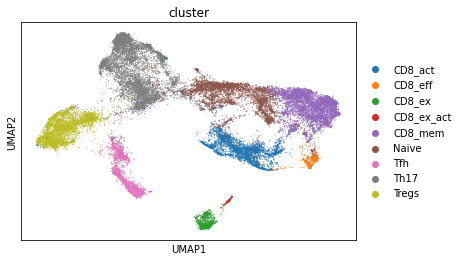

In [46]:
sc.pl.umap(adata_test, color='cluster')

## Sanity Check
Check if 'patient', 'treatment' and 'cluster' values in 'bcc_all_metadata.txt' and 'bcc_tcell_metadata' are aligned

In [47]:
bcc_all_metadata = pd.read_csv('../data/BCC_Yost_2018/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata.head()

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-8.491220,5.533525
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,CD45+ CD3+,CD8_ex_T_cells,4.623724,6.668594
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.920441,3.196553
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.878223,4.333302
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,CD45+ CD3+,Tregs,-2.382094,11.260816


In [48]:
bcc_tcell_metadata = pd.read_csv('../data/BCC_Yost_2018/bcc_tcell_metadata.txt', sep='\t', index_col=0)
bcc_tcell_metadata.head()

,patient,treatment,cluster,UMAP1,UMAP2
cell.id,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287


Cluster values aren't always aligned, some values only exist in either file

In [49]:
bcc_all_metadata.cluster.unique()

array(['CD8_mem_T_cells', 'CD8_ex_T_cells', 'Tregs', 'CD4_T_cells',
       'Tcell_prolif', 'NK_cells', 'B_cells_1', 'CD8_act_T_cells',
       'Macrophages', 'pDCs', 'Plasma_cells', 'DCs', 'CAFs',
       'Endothelial', 'Myofibroblasts', 'B_cells_2', 'Melanocytes',
       'Tumor_1', 'Tumor_2'], dtype=object)

In [50]:
bcc_tcell_metadata.cluster.unique()

array(['CD8_mem', 'Tfh', 'Tregs', 'CD8_ex', 'Th17', 'Naive', 'CD8_eff',
       'CD8_act', 'CD8_ex_act'], dtype=object)

In [51]:
combined_meta = bcc_tcell_metadata.join(bcc_all_metadata, lsuffix='_tcell', rsuffix='_all')#[['cluster_tcell', 'cluster_all']].tail(60)
combined_meta.groupby(['cluster_tcell', 'cluster_all']).size()

cluster_tcell  cluster_all    
CD8_act        CD4_T_cells          86
               CD8_act_T_cells    3639
               CD8_ex_T_cells        1
               CD8_mem_T_cells     130
               Tcell_prolif         19
               Tregs                13
CD8_eff        CD8_act_T_cells      34
               CD8_mem_T_cells     739
               Tcell_prolif          1
               Tregs                 1
CD8_ex         CD4_T_cells           3
               CD8_act_T_cells      15
               CD8_ex_T_cells     1087
               CD8_mem_T_cells      85
               Tcell_prolif         54
               Tregs                20
CD8_ex_act     CD8_act_T_cells     292
               CD8_ex_T_cells        1
               CD8_mem_T_cells       3
               Tcell_prolif          5
               Tregs                 1
CD8_mem        CD4_T_cells          95
               CD8_act_T_cells      52
               CD8_ex_T_cells       20
               CD8_mem_T_cells   

Patient and treatment values are aligned

In [52]:
combined_meta.groupby(['treatment_tcell', 'treatment_all']).size()

treatment_tcell  treatment_all
post             post             19073
pre              pre              14033
dtype: int64

In [53]:
combined_meta.groupby(['patient_tcell', 'patient_all']).size()

patient_tcell  patient_all
su001          su001          4959
su002          su002           274
su003          su003           219
su004          su004           875
su005          su005          3464
su006          su006          3805
su007          su007          1668
su008          su008          4868
su009          su009          9047
su010          su010           626
su012          su012          3301
dtype: int64